# Математика для Data Science

## Оптимизация

Презентация с красивыми графиками

https://iloveeconomics.ru/sites/default/files/n_d_optimization.pdf

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize

Минимизируем функцию $f(x)=x^2-3x+2$

In [4]:
def f(x):
    return x ** 2 - 3 * x + 2

Производная функции: $f'(x)=2x-3$

$f'(x)=0 <=> x_{min} = \frac{3}{2}$

Проверим численно:

In [21]:
x_start = 10
minimize(f, (x_start,))

      fun: -0.25
 hess_inv: array([[0.49999999]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([1.49999999])

Нарисуем график:

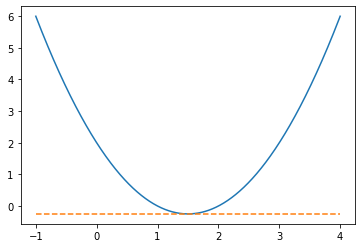

In [18]:
x = np.linspace(-1, 4, 1000)
y = f(x)
minimum = np.ones_like(x) * -0.25

plt.plot(x, y)
plt.plot(x, minimum, '--')

## Задача

Максимизировать функцию $g(x)=-x^5 - 10x^4 + 5x^3 + 10$

P.S. функции maximize нет в scipy

In [ ]:
# Ваш код здесь


## Задача

Построить график производной функции из прошлой задачи

Производную можно вычислить аналитически и задать как функцию в python

In [ ]:
# Ваш код здесь


Оптимизируем функцию многих переменных

In [22]:
def f(x, y):
    return x ** 2 + y ** 2

In [24]:
x_start = [10, 10]
minimize(lambda x: f(x[0], x[1]), (x_start,))

      fun: 9.714371410949269e-13
 hess_inv: array([[ 0.75000002, -0.24999998],
       [-0.24999998,  0.75000002]])
      jac: array([-1.37896909e-06, -1.37896909e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-6.96935126e-07, -6.96935126e-07])

# Теория вероятности

Подбросим монетку разное количество раз

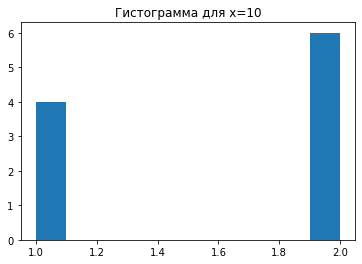

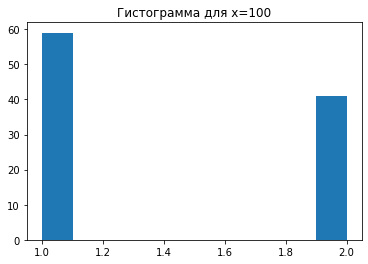

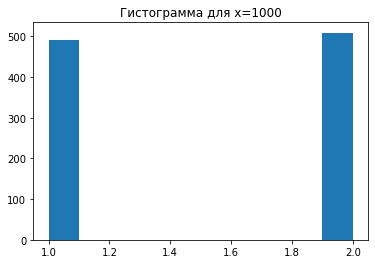

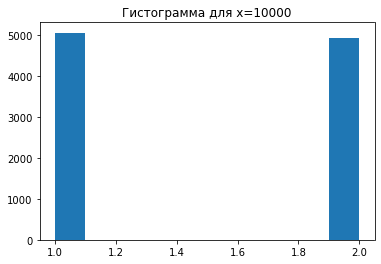

In [35]:
for x_len in [10, 100, 1000, 10000]:
    x = np.random.randint(1, 3, size=(x_len,))
    plt.figure()
    plt.title(f'Гистограмма для x={x_len}')
    plt.hist(x)

## Независимые события

Для независимых событий A и B с вероятностями P(A) и P(B) совместная вероятность (произойдут оба события) считается по формуле

$P(AB) = P(A)P(B)$

Если хотим посчитать вероятность хотя бы одного из двух

$P(A+B) = P(A) + P(B) - P(AB)$

## Дискретные и непрерывные величины

Примеры дискретных величин:

- Бросок монетки
- Бросок игрального кубика
- Вероятность брака изделия

Пример непрерывной величины:

- Значение температуры в комнате за какой-то промежуток времени
- Время прихода автобуса

### Какие величины непрерывные, а какие дискретные?

- Вероятность выжить на титанике
- Изменение цены показателя на бирже
- Пол новорожденного ребенка
- Время, в которое на футбольном матче произойдет первый гол

## Функция распределения

Это функция $F(x)$, которая характеризует вероятность того, что случайная величина примет значение, меньшее $х$

![data/discrete.png](images/discrete.png)
![uniform](images/uniform.png)

## Функция плотности распределения

Это функция $f(x)=F'(x)$

<img src="images/norm_distribution.png" alt="Drawing" style="width: 600px;"/>

Вероятность того, что событие произойдет в промежутке $(a, b)$ равно интегралу функции плотности от $a$ до $b$

<AxesSubplot:ylabel='Density'>

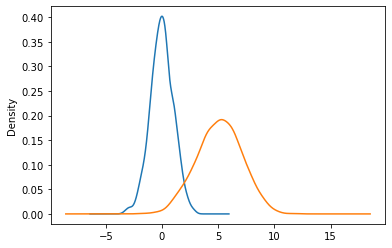

In [90]:
x = np.random.normal(loc=0, scale=1, size=(1000,))
y = np.random.normal(loc=5, scale=2, size=(1000,))
x_df = pd.DataFrame(x)
y_df = pd.DataFrame(y)
x_df[0].plot(kind='density')
y_df[0].plot(kind='density')

Смешаем распределения

<AxesSubplot:ylabel='Density'>

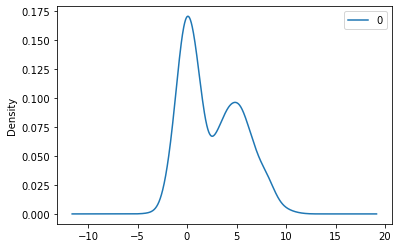

In [88]:
x_df.append(y_df).plot(kind='density')

## Нормальное распределение

Задается функцией плотности распределения

## $$f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Среднее, мода и медиана совпадают и равны $\mu$

Среднеквадратичное отклонение равно $\sigma$

Дисперсия равна $\sigma^2$

Функция распределения называется функцией Лапласа (интеграл от функции выше)

### Примеры нормального распределения

- отклонение при стрельбе
- погрешности измерений
- рост людей

### Приведение нормального распределения к стандартному

x - из нестандартного нормального распределения со средним $\mu$ и среднеквадратичным отклонением $\sigma$

z - соответствующий элемент из стандартного нормального распределения

## $z = \frac{x - \mu}{\sigma}$

## Пример

Из пункта $C$ ведётся стрельба из орудия вдоль прямой $CK$.

Предполагается, что дальность полёта распределена нормально с математическим ожиданием 1000 м и средним квадратическим отклонением 5 м.

Определить (в процентах) сколько снарядов упадёт с перелётом от 5 до 70м.

In [101]:
import scipy.stats

# Функция Лапласа для стандартного нормального распределения
def normal_integral(x):
    return scipy.stats.norm.cdf(x) - 0.5

Вероятность того, что событие $x$ произойдет в промежутке $[a, b]$ ($x$ из стандартного нормального распределения)

$P(x \in [a, b]) = \Phi(b) - \Phi(a) $

In [104]:
a = (1005 - 1000) / 5
b = (1070 - 1000) / 5
answer = normal_integral(b) - normal_integral(a)

round(answer * 100, 2)

15.87

### Правило трех сигм

При нормальном распределении с вероятностью 99% все события лежат в интервале $[\mu - 3\sigma, \mu + 3\sigma]$

<img src="images/3-sigma.svg" alt="Drawing" style="width: 600px;"/>

## Задача 

Диаметр подшипников, изготовленных на заводе, представляет собой случайную величину, распределенную нормально с математическим ожиданием 1,5 см и средним квадратическим отклонением 0,04 см.

Найти вероятность того, что размер наугад взятого подшипника колеблется от 1,4 до 1,6 см.

Оценить порядок величины можно при помощи правила трех сигм (точный ответ можно получить как в задаче выше)

In [107]:
# Ваш код здесь


## Условная вероятность

$P(B|A)$ - вероятность того, что произойдет событие B, если произошло событие A

Отсюда следует формула вероятности совместного наступления событий A и B:

$P(AB)=P(A)P(B|A)=P(B)P(B|A)$


### Формула полной вероятности

Пусть событие $A$ осуществляется лишь при совершении одного из событий $B_1, B_2, ..., B_n$, причем сумма вероятностей $B_i$ равна 1

Тогда вероятность события A будет равна

### $P(A) = P(B_1)P(A|B_1) + P(B_2)P(B_2|A) + ... + P(B_n)P(A|B_n)$

## Задача

Имеются три одинаковые урны.

В первой урне находятся 4 белых и 7 черных шаров, во второй – только белые и в третьей – только черные шары.

Наудачу выбирается одна урна и из неё наугад извлекается шар. 

Какова вероятность того, что этот шар чёрный?

### Теорема Байеса

Допустим, мы предполагаем, что событие $A$ произойдет с вероятность $P(A)$, а $B$ с вероятностью $P(B)$ и эти события связаны. 

Если совершается событие $B$, то мы можем пересчитать вероятность события $A$

## $P(A|B) = \frac{P(B|A)  P(A)}{P(B)}$

Причем $P(B)$ обычно считаем по формуле полной вероятности

## Пример

На склад поступило 2 партии изделий: первая – 4000 штук, вторая – 6000 штук. 

Средний процент нестандартных изделий в первой партии составляет 20%, а во второй – 10%.

Наудачу взятое со склада изделие оказалось стандартным. Найти вероятность того, что оно:

а) из первой партии

б) из второй партии.

### Решение

Всего на складе 10000 изделий.

Тогда 

$P(B_1)=0.4$

$P(B_2)=0.6$

Пусть, $A$ - наудачу взятое изделие оказалось стандартным

$P(A|B_1) = 1 - 0.2 = 0.8$

$P(A|B_2) = 1 - 0.1 = 0.9$

$P(A) = P(B_1)P(A|B_1) + P(B_2)P(A|B_2) = 0.86$

Остается применить формулу Байеса:

$P(B_1|A) - ?$

$P(B_2|A) - ?$

## Задача

По данным о погоде определить:

- вероятность того, что температура будет в промежутке от 10 до 20 градусов
- вероятность того, что температура изменится больше, чем на 5 градусов на следующий день
- вероятность получить отрицательную температуру зимой

In [118]:
# Ваш код здесь
df = pd.read_csv('data/weather.csv', index_col=0, parse_dates=True)
df

,t
Day,
2008-01-01,0
2008-01-02,-5
2008-01-03,-11
2008-01-04,-11
2008-01-05,-12
...,...
2016-12-27,1
2016-12-28,-3
2016-12-29,0


## Задача

По тем же данным посчитать:

- вероятность получить отрицательную температуру, используя формулу полной вероятности.
- вероятность, что сейчас зима, если известно, что температура отрицательна.

## Разница между байесовской вероятностью и классической

<img src="images/bayesianjpg.jpg" alt="Drawing" style="width: 600px;"/>

## Теорема Байеса и тест на ВИЧ

https://www.facebook.com/mifnauka/posts/1819406961640274/

# Домашнее задание

Для выполнения ДЗ опять используем данные Титаника

## Easy

Вычислить вероятность выживания, если пассажиру:

- от 0 до 25 лет
- от 25 до 50 лет
- от 50 лет и старше

## Medium

Вычислить с какой вероятностью пассажир женского пола, если известно, что он выжил (использовать теорему Байеса)

## Hard

Закон распределения задается функцией плотности 

$ f(x) = \lambda e^{-\lambda x}, x > 0 $

$ f(x) = 0, x <= 0 $

Найти вероятность того, что событие произойдет при $x \in [1, 2]$

P.S. в scipy есть функция для интегрирования функции